<a href="https://colab.research.google.com/github/Mayank0195/Capstone_Project_ML_Regression_Retail_Sales_Prediction/blob/main/Retail_Sales_Prediction_part_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set_style("whitegrid")
import sklearn
import warnings
warnings.filterwarnings("ignore")

In [2]:
# importing drive on the colab notebook for the easy access of the data provided 
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
#importing the pathway for the Rossmann Stores Data.csv
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Regression/results.csv')
df1.head()

,Date,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,...,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running,Sales
0,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,2380.483871,20131274,660.709677,0.0,0.0,1,8.039802
1,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,2380.483871,20131274,834.000000,0.0,0.0,1,8.039802
2,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,6567.064516,20131274,660.709677,0.0,0.0,1,8.039802
3,2013-01-01,274,2,0,1.0,1,b,b,3640.0,1,...,1,1,20131274,6567.064516,20131274,834.000000,0.0,0.0,1,8.039802
4,2013-01-01,335,2,0,1.0,1,b,a,90.0,1,...,1,1,20131335,12224.645161,20131335,2367.225806,0.0,0.0,1,7.783641


In [4]:
df2 = df1.copy()

In [5]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 395215 entries, 0 to 395214
Data columns (total 22 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   Date                 395215 non-null  object 
 1   Store                395215 non-null  int64  
 2   DayOfWeek            395215 non-null  int64  
 3   Promo                395215 non-null  int64  
 4   StateHoliday         395215 non-null  float64
 5   SchoolHoliday        395215 non-null  int64  
 6   StoreType            395215 non-null  object 
 7   Assortment           395215 non-null  object 
 8   CompetitionDistance  395215 non-null  float64
 9   Promo2               395215 non-null  int64  
 10  Year                 395215 non-null  int64  
 11  Month                395215 non-null  int64  
 12  WeekOfYear           395215 non-null  int64  
 13  DayOfYear            395215 non-null  int64  
 14  sales_key            395215 non-null  int64  
 15  AvgSales         

In [6]:
df2 = df2.drop(['Date'], axis = 1)

In [7]:
df2.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,Promo2,Year,...,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running,Sales
0,274,2,0,1.0,1,b,b,3640.0,1,2013,...,1,1,20131274,2380.483871,20131274,660.709677,0.0,0.0,1,8.039802
1,274,2,0,1.0,1,b,b,3640.0,1,2013,...,1,1,20131274,2380.483871,20131274,834.000000,0.0,0.0,1,8.039802
2,274,2,0,1.0,1,b,b,3640.0,1,2013,...,1,1,20131274,6567.064516,20131274,660.709677,0.0,0.0,1,8.039802
3,274,2,0,1.0,1,b,b,3640.0,1,2013,...,1,1,20131274,6567.064516,20131274,834.000000,0.0,0.0,1,8.039802
4,335,2,0,1.0,1,b,a,90.0,1,2013,...,1,1,20131335,12224.645161,20131335,2367.225806,0.0,0.0,1,7.783641


## **4. Store Sales Prediction**


**Factors affecting in choosing the model:**
 
Determining which algorithm to use depends on many factors like the problem statement and the kind of output you want, type and size of the data, the available computational time, number of features, and observations in the data, to name a few.

The dataset used in this analysis has:
- A multivariate time series relation with sales and hence a linear relationship cannot be assumed in this analysis. This kind of dataset has patterns such as **peak days, festive seasons** etc which would most likely be considered as outliers in simple linear regression.
- Having X columns with **30% continuous and 70% categorical features**. 

In [8]:
dfd = df2.sample(n=50000, random_state=1)

In [9]:
# split features and labels
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [10]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)
xl = X.copy()

In [11]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)


In [12]:
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

In [13]:
xd_train.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,...,CompetitionOpen,Promo2Open,Promo2running,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
158363,666,6,0,0.0,0,2700.0,1,2013,11,45,...,2.0,32.284932,0,0,0,1,0,0,0,1
44637,92,6,0,0.0,0,240.0,1,2013,3,11,...,0.0,40.175342,0,0,0,1,0,1,0,0
166890,22,6,0,0.0,0,1040.0,1,2013,11,47,...,2.0,17.753425,0,1,0,0,0,1,0,0
360902,272,4,1,0.0,0,16180.0,1,2015,5,21,...,142.0,49.610959,0,1,0,0,0,1,0,0
307024,1083,1,1,0.0,0,11540.0,1,2015,1,5,...,16.0,24.000000,0,0,0,0,1,0,0,1


In [14]:
xd_test.head()

,Store,DayOfWeek,Promo,StateHoliday,SchoolHoliday,CompetitionDistance,Promo2,Year,Month,WeekOfYear,...,CompetitionOpen,Promo2Open,Promo2running,StoreType_a,StoreType_b,StoreType_c,StoreType_d,Assortment_a,Assortment_b,Assortment_c
218394,399,3,0,0.0,1,5360.0,1,2014,4,17,...,19.0,30.706849,1,1,0,0,0,1,0,0
23933,872,5,0,0.0,0,3860.0,1,2013,2,5,...,0.0,0.000000,0,1,0,0,0,0,0,1
330202,706,6,0,0.0,0,7830.0,1,2015,3,11,...,6.0,12.230137,1,0,0,0,1,1,0,0
34517,401,6,0,0.0,0,9200.0,1,2013,2,8,...,40.0,10.619178,0,1,0,0,0,0,0,1
17753,597,4,1,0.0,0,150.0,1,2013,1,4,...,52.0,12.690411,0,1,0,0,0,1,0,0


In [15]:
#metrics import
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## **6.1 Linear Regression (OLS)**

In [16]:
from sklearn.linear_model import LinearRegression
lin= LinearRegression()
linreg = lin.fit(xd_train, yd_train)

In [17]:
# definte RMSE function
from sklearn.metrics import mean_squared_error
from math import sqrt

def rmse(x, y):
    return sqrt(mean_squared_error(x, y))

# definte MAPE function
def mape(x, y): 
    return np.mean(np.abs((x - y) / x)) * 100  
  
# get cross validation scores 
yd_predicted = linreg.predict(xd_train)
yd_test_predicted = linreg.predict(xd_test)

a = linreg.score(xd_train, yd_train)
b = linreg.score(xd_test, yd_test)
c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Regression Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)
print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)

Regression Model Score : 0.6684336224556722 , Out of Sample Test Score : 0.6648058943579574
Training RMSE : 0.23446356735844595 Testing RMSE : 0.23651278421978153
Training MAPE : 1.9589629462038072 Testing MAPE : 1.9750885139396779
R2_train : 0.668434 , R2_test : 0.664806
Adj_r2_train : 0.668197 , Adj_r2_test : 0.664246


In [18]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regression Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['LinearRegression', a, b, c, d, e, f, g, h, i, j]
df_1= dict(zip(comparison_columns,metric_scores))

In [19]:
df_1

{'Adj_r2_test': 0.664246,
 'Adj_r2_train': 0.668197,
 'Model_Name': 'LinearRegression',
 'R2_test': 0.664806,
 'R2_train': 0.668434,
 'Regression Model Score': 0.6684336224556722,
 'Sample Test Score': 0.6648058943579574,
 'Testing MAPE': 1.9750885139396779,
 'Testing RMSE': 0.23651278421978153,
 'Training MAPE': 1.9589629462038072,
 'Training RMSE': 0.23446356735844595}

## **6.2 Bayesian Ridge Regression**

In [20]:
from sklearn.linear_model import BayesianRidge
rdg = BayesianRidge()
rdgreg = rdg.fit(xd_train, yd_train)

In [21]:
# validation

yd_predicted = rdgreg.predict(xd_train)
yd_test_predicted = rdgreg.predict(xd_test)

a = rdgreg.score(xd_train, yd_train)
b = rdgreg.score(xd_test, yd_test)
c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Regression Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)
print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)

Regression Model Score : 0.6684266531255033 , Out of Sample Test Score : 0.6648144263410941
Training RMSE : 0.23446603148861345 Testing RMSE : 0.23650977411922525
Training MAPE : 1.9588627673499448 Testing MAPE : 1.9749627302939214
R2_train : 0.668427 , R2_test : 0.664814
Adj_r2_train : 0.66819 , Adj_r2_test : 0.664255


In [22]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regression Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['BayesianRidge', a, b, c, d, e, f, g, h, i, j]
df3= dict(zip(comparison_columns,metric_scores))

In [23]:
df3

{'Adj_r2_test': 0.664255,
 'Adj_r2_train': 0.66819,
 'Model_Name': 'BayesianRidge',
 'R2_test': 0.664814,
 'R2_train': 0.668427,
 'Regression Model Score': 0.6684266531255033,
 'Sample Test Score': 0.6648144263410941,
 'Testing MAPE': 1.9749627302939214,
 'Testing RMSE': 0.23650977411922525,
 'Training MAPE': 1.9588627673499448,
 'Training RMSE': 0.23446603148861345}

In [24]:
df_1 = pd.DataFrame([df_1])

In [25]:
df_1

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246


In [26]:
df3 = pd.DataFrame([df3])

In [27]:
comparison_df1 = df_1.merge(df3, how='outer')
comparison_df1

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255


## **6.3 LARS Lasso Regression**

In [28]:
from sklearn.linear_model import LassoLars
las = LassoLars(alpha=0.3, fit_intercept=False, normalize=True)
lasreg = las.fit(xd_train, yd_train)

In [29]:
print("Regresion Model Score" , ":" , lasreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , lasreg.score(xd_test, yd_test))

yd_predicted = lasreg.predict(xd_train)
yd_test_predicted = lasreg.predict(xd_test)

a = lasreg.score(xd_train, yd_train)
b = lasreg.score(xd_train, yd_train)
c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)


Regresion Model Score : 0.4687166561274967 , Out of Sample Test Score : 0.46302640927851946
Training RMSE : 0.2967927080988522 Testing RMSE : 0.29935250559262006
Training MAPE : 2.6347307408957943 Testing MAPE : 2.6512302471588236
R2_train : 0.468717 , R2_test : 0.463026
Adj_r2_train : 0.468337 , Adj_r2_test : 0.46213


In [30]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regression Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['LassoLars', a, b, c, d, e, f, g, h, i, j]
df3= dict(zip(comparison_columns,metric_scores))

In [31]:
df3 = pd.DataFrame([df3])

In [32]:
comparison_df1 = comparison_df1.merge(df3, how='outer')
comparison_df1

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130


## **6.4 Decision Tree Regression**

In [33]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(min_samples_leaf=20)
treereg = tree.fit(xl_train, yl_train)

In [34]:
a = treereg.score(xl_train, yl_train)
b = treereg.score(xl_test, yl_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)   

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)

c = rmse(yl_train, yl_predicted)
d = rmse(yl_test, yl_test_predicted)
e = mape(yl_train, yl_predicted)
f = mape(yl_test, yl_test_predicted)
g = round(r2_score(yl_train, yl_predicted),6)
h = round(r2_score(yl_test, yl_test_predicted),6)
i = round(1 - (1-r2_score(yl_train, yl_predicted)) * (len(yl_train)-1)/(len(yl_train)-xl_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yl_test, yl_test_predicted)) * (len(yl_test)-1)/(len(yl_test)-xl_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)


Regresion Model Score : 0.8241543943162353 , Out of Sample Test Score : 0.7502851060839023
Training RMSE : 0.17074810252383216 Testing RMSE : 0.20414025697989252
Training MAPE : 1.406284397451301 Testing MAPE : 1.6788959386340403
R2_train : 0.824154 , R2_test : 0.750285
Adj_r2_train : 0.824054 , Adj_r2_test : 0.749952


In [35]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regression Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['DecisionTreeRegressor', a, b , c, d, e, f, g, h, i, j]
df4 = dict(zip(comparison_columns,metric_scores))

In [36]:
df4 = pd.DataFrame([df4])

In [37]:
df4

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,DecisionTreeRegressor,0.824154,0.750285,0.170748,0.20414,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952


In [38]:
comparison_df1 = comparison_df1.merge(df4, how='outer')
comparison_df1

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750285,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952


## **6.5 Random Forest Regression**

In [39]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=30)
rdfreg = rdf.fit(xl_train, yl_train)

In [40]:
a = rdfreg.score(xl_train, yl_train)
b = rdfreg.score(xl_test, yl_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

yl_predicted = treereg.predict(xl_train)
yl_test_predicted = treereg.predict(xl_test)


c = rmse(yl_train, yl_predicted)
d = rmse(yl_test, yl_test_predicted)
e = mape(yl_train, yl_predicted)
f = mape(yl_test, yl_test_predicted)
g = round(r2_score(yl_train, yl_predicted),6)
h = round(r2_score(yl_test, yl_test_predicted),6)
i = round(1 - (1-r2_score(yl_train, yl_predicted)) * (len(yl_train)-1)/(len(yl_train)-xl_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yl_test, yl_test_predicted)) * (len(yl_test)-1)/(len(yl_test)-xl_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)




Regresion Model Score : 0.976015942866224 , Out of Sample Test Score : 0.8327257677384927
Training RMSE : 0.17074810252383216 Testing RMSE : 0.20414025697989252
Training MAPE : 1.406284397451301 Testing MAPE : 1.6788959386340403
R2_train : 0.824154 , R2_test : 0.750285
Adj_r2_train : 0.824054 , Adj_r2_test : 0.749952


In [41]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regression Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['RandomForestRegressor', a, b, c, d, e, f, g, h, i, j]
df5= dict(zip(comparison_columns,metric_scores))

In [42]:
df5 = pd.DataFrame([df5])

In [43]:
comparison_df1 = comparison_df1.merge(df5, how='outer')
comparison_df1

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750285,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952
4,RandomForestRegressor,0.976016,0.832726,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952


## **6.6 K-Nearest Neighbors Regression**

In [44]:
from sklearn.neighbors import KNeighborsRegressor
knn = KNeighborsRegressor(n_neighbors = 10)
knnreg = knn.fit(xd_train, yd_train)

In [45]:
a = knnreg.score(xd_train, yd_train)
b =  knnreg.score(xd_test, yd_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" ,b)

yd_predicted = knnreg.predict(xd_train)
yd_test_predicted = knnreg.predict(xd_test)

c = rmse(yd_train, yd_predicted)
d = rmse(yd_test, yd_test_predicted)
e = mape(yd_train, yd_predicted)
f = mape(yd_test, yd_test_predicted)
g = round(r2_score(yd_train, yd_predicted),6)
h = round(r2_score(yd_test, yd_test_predicted),6)
i = round(1 - (1-r2_score(yd_train, yd_predicted)) * (len(yd_train)-1)/(len(yd_train)-xd_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yd_test, yd_test_predicted)) * (len(yd_test)-1)/(len(yd_test)-xd_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)


Regresion Model Score : 0.5816706310119596 , Out of Sample Test Score : 0.47721490226252594
Training RMSE : 0.26335969099067963 Testing RMSE : 0.295371122712172
Training MAPE : 2.3613190576784397 Testing MAPE : 2.641301845005007
R2_train : 0.581671 , R2_test : 0.477215
Adj_r2_train : 0.581372 , Adj_r2_test : 0.476342


In [46]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regression Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['KNeighborsRegressor', a, b, c, d, e, f, g, h, i, j]
df6 = dict(zip(comparison_columns,metric_scores))

In [47]:
for x in range(1,10):
    knn = KNeighborsRegressor(n_neighbors = x)
    knnreg = knn.fit(xd_train, yd_train)
    print("Regresion Model Score" , ":" , knnreg.score(xd_train, yd_train) , "," ,
      "Out of Sample Test Score" ,":" , knnreg.score(xd_test, yd_test))

Regresion Model Score : 0.9665318320714792 , Out of Sample Test Score : 0.15079592078352555
Regresion Model Score : 0.786224471392569 , Out of Sample Test Score : 0.33713599503140623
Regresion Model Score : 0.705493749802024 , Out of Sample Test Score : 0.40258467631232353
Regresion Model Score : 0.6668916260793819 , Out of Sample Test Score : 0.43334235291362067
Regresion Model Score : 0.6408814433663594 , Out of Sample Test Score : 0.44756573121600296
Regresion Model Score : 0.6233878386865972 , Out of Sample Test Score : 0.4590440208268328
Regresion Model Score : 0.6087273379697182 , Out of Sample Test Score : 0.46786091698604704
Regresion Model Score : 0.5980783350310922 , Out of Sample Test Score : 0.47262416891886694
Regresion Model Score : 0.5888597584827402 , Out of Sample Test Score : 0.47586432430712633


In [48]:
df6 = pd.DataFrame([df6])

In [49]:
comparison_df1 = comparison_df1.merge(df6, how='outer')
comparison_df1

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750285,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952
4,RandomForestRegressor,0.976016,0.832726,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952
5,KNeighborsRegressor,0.581671,0.477215,0.263360,0.295371,2.361319,2.641302,0.581671,0.477215,0.581372,0.476342


## **6.7 Random Forest Regression Tuned**

 In this we have done the hyperparamtere tunning of Random Forest to get the best parameters and to use these parameters to tune the regresssion model that will helps us to get best results.

In [50]:
# Create model
rf_tuned = RandomForestRegressor()

In [51]:
#import
from sklearn.model_selection import RandomizedSearchCV
#grid
random_grid = {'bootstrap': [True, False],
 'max_depth': [ 90, 100, None],
 'max_features': ['auto', 'sqrt'],
 'min_samples_leaf': [1, 2, 4],
 'min_samples_split': [2, 5, 8],
 'n_estimators': [100, 130, 150]}

rf_random = RandomizedSearchCV(estimator = rf_tuned, param_distributions = random_grid, n_iter = 10, cv = 3, verbose=2, random_state=42)

#fitting
rf_random.fit(xl_train,yl_train)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  18.7s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  18.8s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=4, min_samples_split=8, n_estimators=100; total time=  19.9s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  25.0s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  25.5s
[CV] END bootstrap=True, max_depth=None, max_features=auto, min_samples_leaf=1, min_samples_split=2, n_estimators=100; total time=  25.2s
[CV] END bootstrap=True, max_depth=None, max_features=sqrt, min_samples_leaf=1, min_samples_split=2, n_estimato

RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(),
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [90, 100, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 8],
                                        'n_estimators': [100, 130, 150]},
                   random_state=42, verbose=2)

In [52]:
#best para
rf_random.best_params_

{'bootstrap': False,
 'max_depth': 90,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 8,
 'n_estimators': 130}

In [53]:
#save the best parameters
random_t = rf_random.best_estimator_

In [54]:
#using the best parameter to tune the Random Forest Regresion to make it a Tuned random Forest
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=130, max_depth = 90, bootstrap=False, max_features='sqrt', min_samples_leaf=1, min_samples_split= 8)
rdfreg = rdf.fit(xl_train, yl_train)

In [55]:
a = rdfreg.score(xl_train, yl_train)
b = rdfreg.score(xl_test, yl_test)

print("Regresion Model Score" , ":" , a , "," ,
      "Out of Sample Test Score" ,":" , b)   

yl_predicted = rdfreg.predict(xl_train)
yl_test_predicted = rdfreg.predict(xl_test)

c = rmse(yl_train, yl_predicted)
d = rmse(yl_test, yl_test_predicted)
e = mape(yl_train, yl_predicted)
f = mape(yl_test, yl_test_predicted)
g = round(r2_score(yl_train, yl_predicted),6)
h = round(r2_score(yl_test, yl_test_predicted),6)
i = round(1 - (1-r2_score(yl_train, yl_predicted)) * (len(yl_train)-1)/(len(yl_train)-xl_train.shape[1]-1),6)
j = round(1 - (1-r2_score(yl_test, yl_test_predicted)) * (len(yl_test)-1)/(len(yl_test)-xl_test.shape[1]-1),6)

print("Training RMSE", ":", c,
      "Testing RMSE", ":", d)
print("Training MAPE", ":", e,
      "Testing MAPE", ":", f)
print("R2_train" , ":" , g , "," ,
      "R2_test" ,":" , h)
print("Adj_r2_train" , ":" , i , "," ,
      "Adj_r2_test" ,":" , j)

Regresion Model Score : 0.9769011489258295 , Out of Sample Test Score : 0.8472491809084299
Training RMSE : 0.06188498865137925 Testing RMSE : 0.15966076579407498
Training MAPE : 0.5187331958990382 Testing MAPE : 1.3254771914936778
R2_train : 0.976901 , R2_test : 0.847249
Adj_r2_train : 0.976888 , Adj_r2_test : 0.847045


In [56]:
#Columns needed to compare metrics
comparison_columns = ['Model_Name', 'Regression Model Score', 'Sample Test Score', 'Training RMSE', 'Testing RMSE', 'Training MAPE' , 'Testing MAPE', 'R2_train', 'R2_test', 'Adj_r2_train','Adj_r2_test']

metric_scores = ['RandomForestRegressorTuned', a, b, c, d, e, f, g, h, i, j]
df5= dict(zip(comparison_columns,metric_scores))

In [57]:
df5 = pd.DataFrame([df5])

In [58]:
df5

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,RandomForestRegressorTuned,0.976901,0.847249,0.061885,0.159661,0.518733,1.325477,0.976901,0.847249,0.976888,0.847045


In [59]:
comparison_df1 = comparison_df1.merge(df5, how='outer')
comparison_df1

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750285,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952
4,RandomForestRegressor,0.976016,0.832726,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952
5,KNeighborsRegressor,0.581671,0.477215,0.263360,0.295371,2.361319,2.641302,0.581671,0.477215,0.581372,0.476342
6,RandomForestRegressorTuned,0.976901,0.847249,0.061885,0.159661,0.518733,1.325477,0.976901,0.847249,0.976888,0.847045


## **7. Model Performance and Evaluation**

In [60]:
#Taking a look of our final comparison dataframe
comparison_df1

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750285,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952
4,RandomForestRegressor,0.976016,0.832726,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952
5,KNeighborsRegressor,0.581671,0.477215,0.263360,0.295371,2.361319,2.641302,0.581671,0.477215,0.581372,0.476342
6,RandomForestRegressorTuned,0.976901,0.847249,0.061885,0.159661,0.518733,1.325477,0.976901,0.847249,0.976888,0.847045


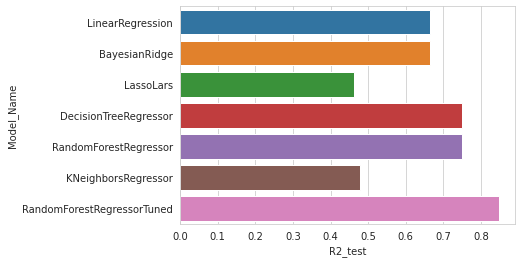

In [61]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df1['Model_Name'], x = comparison_df1['R2_test'])

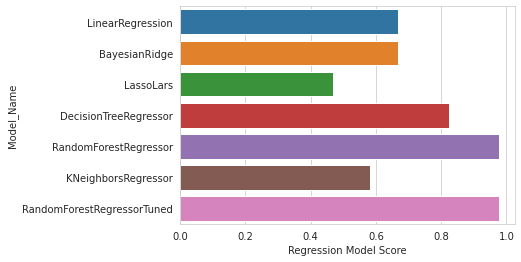

In [62]:
#visualising our comparison df for Test R2
sns.barplot(y=comparison_df1['Model_Name'], x = comparison_df1['Regression Model Score'])

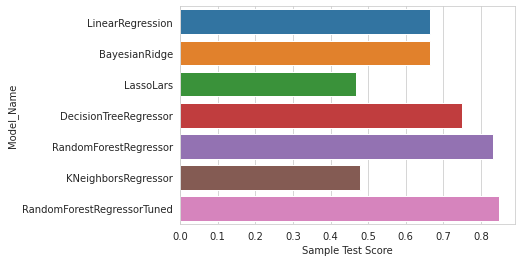

In [63]:
#visualising our comparison df for Test R2
sns.barplot(x=comparison_df1['Sample Test Score'], y = comparison_df1['Model_Name'])

In [64]:
comparison_df1

,Model_Name,Regression Model Score,Sample Test Score,Training RMSE,Testing RMSE,Training MAPE,Testing MAPE,R2_train,R2_test,Adj_r2_train,Adj_r2_test
0,LinearRegression,0.668434,0.664806,0.234464,0.236513,1.958963,1.975089,0.668434,0.664806,0.668197,0.664246
1,BayesianRidge,0.668427,0.664814,0.234466,0.236510,1.958863,1.974963,0.668427,0.664814,0.668190,0.664255
2,LassoLars,0.468717,0.468717,0.296793,0.299353,2.634731,2.651230,0.468717,0.463026,0.468337,0.462130
3,DecisionTreeRegressor,0.824154,0.750285,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952
4,RandomForestRegressor,0.976016,0.832726,0.170748,0.204140,1.406284,1.678896,0.824154,0.750285,0.824054,0.749952
5,KNeighborsRegressor,0.581671,0.477215,0.263360,0.295371,2.361319,2.641302,0.581671,0.477215,0.581372,0.476342
6,RandomForestRegressorTuned,0.976901,0.847249,0.061885,0.159661,0.518733,1.325477,0.976901,0.847249,0.976888,0.847045


In [65]:
comparison_df1.loc[:,["Model_Name","Sample Test Score","R2_test","Adj_r2_test"]]

,Model_Name,Sample Test Score,R2_test,Adj_r2_test
0,LinearRegression,0.664806,0.664806,0.664246
1,BayesianRidge,0.664814,0.664814,0.664255
2,LassoLars,0.468717,0.463026,0.462130
3,DecisionTreeRegressor,0.750285,0.750285,0.749952
4,RandomForestRegressor,0.832726,0.750285,0.749952
5,KNeighborsRegressor,0.477215,0.477215,0.476342
6,RandomForestRegressorTuned,0.847249,0.847249,0.847045


**Since R^2 test and Adjusted R^2 test has the same value for decison tree and random forest we have to see some other paramater which will give us a better insight to differentiate between the three models.**

### **Random Forest vs Decision Tree Models**

In [66]:
#Sample Test Score of the selected models
Decision_Tree_Sts = 0.750223
Random_Forest_Sts = 0.833465
Random_Forest_Tuned_Sts = 0.848593

In [67]:
#improvement % 
improvement_r = ((Random_Forest_Sts - Decision_Tree_Sts)/Decision_Tree_Sts)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest against Decision Tree.')

Model Performance
Improvement of 11.096 % was seen in Random Forest against Decision Tree.


### **Random Forest Tuned vs Random Forest Models**

In [68]:
#improvement % of tuned vs simple random forest
improvement_r = ((Random_Forest_Tuned_Sts - Random_Forest_Sts)/Random_Forest_Sts)*100
print('Model Performance')
print(f'Improvement of {round(improvement_r,3)} % was seen in Random Forest Tuned against Simple Random Forest.')

Model Performance
Improvement of 1.815 % was seen in Random Forest Tuned against Simple Random Forest.


### **Observation**

* Since the R^2 Score and the Adjusted_r^2_Score is similar in two of the three cases and hence we have to shift to the Sample Test Score.
* The Sample Test Score was seen in tuned Random Forest model with the value **0.848593** which was only **1.815 %** improved from a simple random forest model. 
* It seems like we have maxed out on performance with the data and these models.

Text(0.5, 0, 'Relative Importance')

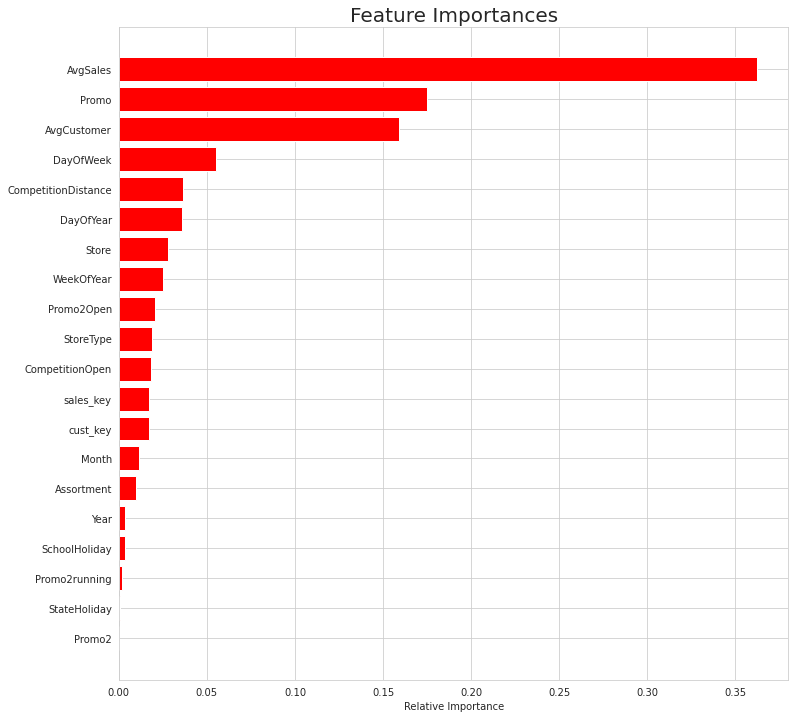

In [69]:
features = xl_test.columns
importances = rdfreg.feature_importances_
indices = np.argsort(importances)
plt.figure(figsize=(12,12))
plt.title('Feature Importances', fontsize=20)
plt.barh(range(len(indices)), importances[indices], color='red', align='center')
plt.yticks(range(len(indices)), features[indices])
plt.xlabel('Relative Importance')

### **8. Store wise Sales Predictions**

In [70]:
#importing the pathway for the Rossmann Stores Data.csv
df1 = pd.read_csv('/content/drive/MyDrive/AlmaBetter/Capstone_Project_ML_Regression/test.csv',)
df1.head()


,Date,Store,DayOfWeek,Sales,Promo,StateHoliday,SchoolHoliday,StoreType,Assortment,CompetitionDistance,...,Month,WeekOfYear,DayOfYear,sales_key,AvgSales,cust_key,AvgCustomer,CompetitionOpen,Promo2Open,Promo2running
0,2013-01-01,85,2,4220,0,1.0,1,b,a,1870.0,...,1,1,1,2013185,6613.290323,2013185,930.000000,15.0,24.920548,0
1,2013-01-01,259,2,6851,0,1.0,1,b,b,210.0,...,1,1,1,20131259,6079.354839,20131259,1420.387097,0.0,24.920548,0
2,2013-01-01,259,2,6851,0,1.0,1,b,b,210.0,...,1,1,1,20131259,6079.354839,20131259,511.774194,0.0,24.920548,0
3,2013-01-01,259,2,6851,0,1.0,1,b,b,210.0,...,1,1,1,20131259,5427.290323,20131259,1420.387097,0.0,24.920548,0
4,2013-01-01,259,2,6851,0,1.0,1,b,b,210.0,...,1,1,1,20131259,5427.290323,20131259,511.774194,0.0,24.920548,0


In [71]:
dfd = df1.sample(n=50000, random_state=1)

In [72]:
dfd.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 50000 entries, 79585 to 169000
Data columns (total 22 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 50000 non-null  object 
 1   Store                50000 non-null  int64  
 2   DayOfWeek            50000 non-null  int64  
 3   Sales                50000 non-null  int64  
 4   Promo                50000 non-null  int64  
 5   StateHoliday         50000 non-null  float64
 6   SchoolHoliday        50000 non-null  int64  
 7   StoreType            50000 non-null  object 
 8   Assortment           50000 non-null  object 
 9   CompetitionDistance  50000 non-null  float64
 10  Promo2               50000 non-null  int64  
 11  Year                 50000 non-null  int64  
 12  Month                50000 non-null  int64  
 13  WeekOfYear           50000 non-null  int64  
 14  DayOfYear            50000 non-null  int64  
 15  sales_key            50000 non-

In [73]:
#setting date and store as index
dfd.set_index(['Date','Store'],inplace=True)
#sorting index following the time series
dfd.sort_index(inplace=True)

In [74]:
dfd.head()

DayOfWeek  Sales  Promo  StateHoliday  SchoolHoliday  \
Date       Store                                                         
2013-01-01 85             2   4220      0           1.0              1   
           259            2   6851      0           1.0              1   
           262            2  17267      0           1.0              1   
2013-01-02 12             3   5029      0           0.0              1   
           18             3   5143      0           0.0              1   

                 StoreType Assortment  CompetitionDistance  Promo2  Year  \
Date       Store                                                           
2013-01-01 85            b          a               1870.0       0  2013   
           259           b          b                210.0       0  2013   
           262           b          a               1180.0       0  2013   
2013-01-02 12            a          c               1070.0       1  2013   
           18            d          c              13840.0       1  2013   

                  Month  WeekOfYear  DayOfYear  sales_key     AvgSales  \
Date       Store                                                         
2013-01-01 85         1           1          1    2013185  6613.290323   
           259        1           1          1   20131259  5427.290323   
           262        1           1          1   20131262  5764.516129   
2013-01-02 12         1           1          2    2013112  4287.600000   
           18         1           1          2    2013118  4406.933333   

                  cust_key  AvgCustomer  CompetitionOpen  Promo2Open  \
Date       Store                                                       
2013-01-01 85      2013185   930.000000             15.0   24.920548   
           259    20131259  1420.387097              0.0   24.920548   
           262    20131262   619.935484              0.0   24.920548   
2013-01-02 12      2013112   685.870968              0.0   33.238356   
           18      2013118   532.933333             31.0    9.008219   

                  Promo2running  
Date       Store                 
2013-01-01 85                 0  
           259                0  
           262                0  
2013-01-02 12                 1  
           18                 1

In [75]:
# split features and labels
X = dfd.drop('Sales', axis=1)
y = dfd. Sales

In [76]:
# get dummy variables for categorical features for linear regression
xd = X.copy()
xd = pd.get_dummies(xd)


In [77]:
# label nominal variables for tree based regression
xl = X.copy()

from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
xl.StateHoliday = label.fit_transform(xl.StateHoliday)
xl.Assortment = label.fit_transform(xl.Assortment)
xl.StoreType = label.fit_transform(xl.StoreType)

In [78]:
xl.head()

DayOfWeek  Promo  StateHoliday  SchoolHoliday  StoreType  \
Date       Store                                                             
2013-01-01 85             2      0             1              1          1   
           259            2      0             1              1          1   
           262            2      0             1              1          1   
2013-01-02 12             3      0             0              1          0   
           18             3      0             0              1          3   

                  Assortment  CompetitionDistance  Promo2  Year  Month  \
Date       Store                                                         
2013-01-01 85              0               1870.0       0  2013      1   
           259             1                210.0       0  2013      1   
           262             0               1180.0       0  2013      1   
2013-01-02 12              2               1070.0       1  2013      1   
           18              2              13840.0       1  2013      1   

                  WeekOfYear  DayOfYear  sales_key     AvgSales  cust_key  \
Date       Store                                                            
2013-01-01 85              1          1    2013185  6613.290323   2013185   
           259             1          1   20131259  5427.290323  20131259   
           262             1          1   20131262  5764.516129  20131262   
2013-01-02 12              1          2    2013112  4287.600000   2013112   
           18              1          2    2013118  4406.933333   2013118   

                  AvgCustomer  CompetitionOpen  Promo2Open  Promo2running  
Date       Store                                                           
2013-01-01 85      930.000000             15.0   24.920548              0  
           259    1420.387097              0.0   24.920548              0  
           262     619.935484              0.0   24.920548              0  
2013-01-02 12      685.870968              0.0   33.238356              1  
           18      532.933333             31.0    9.008219              1

In [79]:
xl.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 50000 entries, ('2013-01-01', 85) to ('2015-07-31', 1115)
Data columns (total 19 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   DayOfWeek            50000 non-null  int64  
 1   Promo                50000 non-null  int64  
 2   StateHoliday         50000 non-null  int64  
 3   SchoolHoliday        50000 non-null  int64  
 4   StoreType            50000 non-null  int64  
 5   Assortment           50000 non-null  int64  
 6   CompetitionDistance  50000 non-null  float64
 7   Promo2               50000 non-null  int64  
 8   Year                 50000 non-null  int64  
 9   Month                50000 non-null  int64  
 10  WeekOfYear           50000 non-null  int64  
 11  DayOfYear            50000 non-null  int64  
 12  sales_key            50000 non-null  int64  
 13  AvgSales             50000 non-null  float64
 14  cust_key             50000 non-null  int64  
 15  AvgC

In [80]:
# split training and test datasets from the new sample
from sklearn.model_selection import train_test_split
xd_train,xd_test,yd_train,yd_test = train_test_split(xd,y,test_size=0.3, random_state=1)
xl_train,xl_test,yl_train,yl_test = train_test_split(xl,y,test_size=0.3, random_state=1)

In [81]:
from sklearn.ensemble import RandomForestRegressor
rdf = RandomForestRegressor(n_estimators=130, max_depth = 90, bootstrap=False, max_features='sqrt', min_samples_leaf=1, min_samples_split= 8)
rdfreg = rdf.fit(xl_train, yl_train)

In [82]:
#predictions 
y_pred_test = rdfreg.predict(xl_test)
df = yl_test.copy()

In [83]:
df = pd.DataFrame(df)
df

,,Sales
Date,Store,
2014-04-07,393,5261
2014-10-08,576,7693
2014-09-26,751,2459
2013-11-02,795,5237
2013-08-09,53,5221
...,...,...
2013-09-28,564,4786
2015-03-09,268,4301
2014-11-22,193,4133


In [84]:
df['Pred_Sales'] = y_pred_test.tolist()

In [85]:
df[:5]

,,Sales,Pred_Sales
Date,Store,,
2014-04-07,393,5261,4772.381886
2014-10-08,576,7693,7137.052033
2014-09-26,751,2459,3569.874414
2013-11-02,795,5237,4009.370238
2013-08-09,53,5221,5661.072234


In [86]:
#locating
df.loc[('2013-01-31',231)]

,,Sales,Pred_Sales
Date,Store,,
2013-01-31,231,4411,4702.302766


# **9. Conclusion and Recommendations**

## **Conclusion**

Businesses use sales forecasts to determine what revenue they will be generating in a particular timespan to empower themselves with powerful and strategic business plans. Important decisions such as budgets, hiring, incentives, goals, acquisitions and various other growth plans are affected by the revenue the company is going to make in the coming months and for these plans to be as effective as they are planned to be it is important for these forecasts to also be as good.

he work here forecasts the sales of the various Rossmann stores across Europe  and compares the results from the models developed with the actual sales values.

Some important conclusions drawn from the analysis are as follows:
* There were more sales on Monday, probably because shops generally remain closed on Sundays which had the lowest sales in a week. This validates the hypothesis about this feature.
* **The positive effect of promotion on Customers and Sales is observable**.
* Most stores have competition distance within the range of **0 to 10 kms** and had more sales than stores far away probably indicating competition in busy locations vs remote locations.
* **Store type B** though being few in number had the **highest sales average**. The reasons include all three kinds of assortments specially assortment level b which is only available at type b stores and being open on sundays as well.
* The outliers in the dataset showed justifiable behaviour. The outliers were either of store type b or had promotion going on which increased sales.
* **Random Forest Tuned Model gave the best results** and only **1.815 %** improvement was seen from the basic random forest model which indicates that all the trends and patterns that could be captured by these models without overfitting were done and maximum level of performance achievable by the model was achieved.

**Recommendations**
* More stores should be encouraged for promotion. 
* Store type B should be increased in number.
* There's a seasonality involved, hence the stores should be encouraged to promote and take advantage of the holidays.